In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import warnings 
warnings.filterwarnings("ignore")
import nltk 
from nltk.stem.porter import PorterStemmer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
data_set=pd.read_csv(r"medicine.csv")

In [3]:
data_set.head()

,index,Drug_Name,Reason,Description
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,Acne,Mild to moderate acne (spots)
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,Acne,A RET 0.025% is a prescription medicine that i...
2,3,ACGEL CL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
3,4,ACGEL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
4,5,Acleen 1% Lotion 25ml,Acne,treat the most severe form of acne (nodular ac...


In [4]:
data_set.dtypes

index           int64
Drug_Name      object
Reason         object
Description    object
dtype: object

In [5]:
data_set.shape

(9720, 4)

In [6]:
data_set.isnull().sum()

index          0
Drug_Name      0
Reason         0
Description    0
dtype: int64

In [7]:
data_set.duplicated().sum()

0

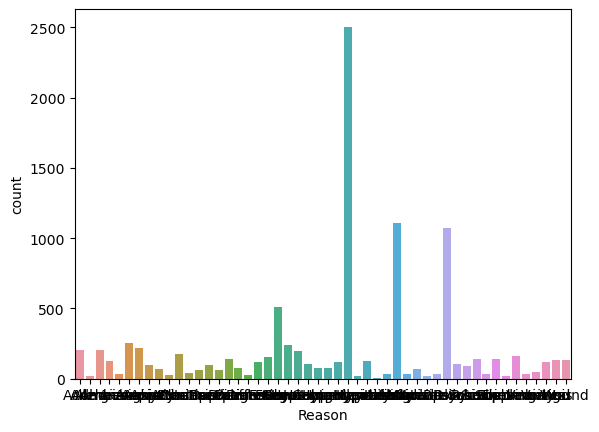

In [8]:
sb.countplot(x="Reason",data=data_set)
plt.show()

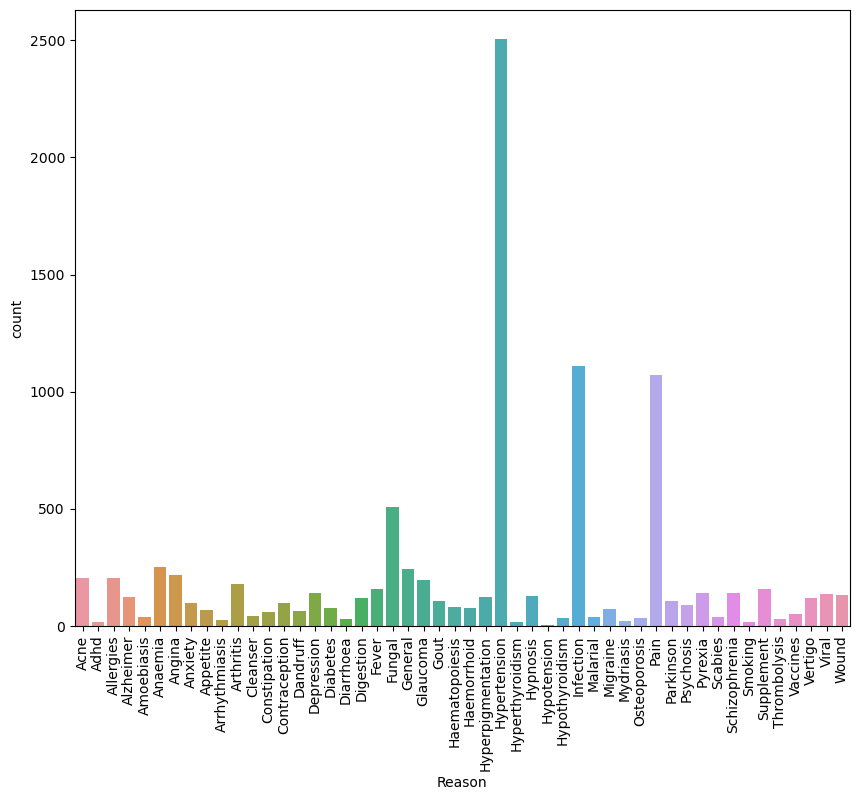

In [9]:
plt.figure(figsize=(10,8))
sb.countplot("Reason",data=data_set)
plt.xticks(rotation=90)
plt.show()

In [10]:
# tokenization

In [11]:
data_set["Description"][0]

'Mild to moderate acne (spots)'

In [12]:
data_set["Description"][0].split(" ")

['Mild', 'to', 'moderate', 'acne', '(spots)']

In [13]:
data_set["Description"]=data_set["Description"].apply(lambda x:x.split(' '))
data_set["Reason"]=data_set["Reason"].apply(lambda x:x.split(' '))

In [14]:
data_set.head()

,index,Drug_Name,Reason,Description
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,[Acne],"[Mild, to, moderate, acne, (spots)]"
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,[Acne],"[A, RET, 0.025%, is, a, prescription, medicine..."
2,3,ACGEL CL NANO Gel 15gm,[Acne],"[It, is, used, to, treat, acne, vulgaris, in, ..."
3,4,ACGEL NANO Gel 15gm,[Acne],"[It, is, used, to, treat, acne, vulgaris, in, ..."
4,5,Acleen 1% Lotion 25ml,[Acne],"[treat, the, most, severe, form, of, acne, (no..."


In [15]:
data_set["Description"]=data_set["Description"].apply(lambda x:[i.replace(" ","") for i in x])
data_set["Description"]=data_set["Description"].apply(lambda x:[i.replace(" ","") for i in x])

In [16]:
data_set.head()

,index,Drug_Name,Reason,Description
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,[Acne],"[Mild, to, moderate, acne, (spots)]"
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,[Acne],"[A, RET, 0.025%, is, a, prescription, medicine..."
2,3,ACGEL CL NANO Gel 15gm,[Acne],"[It, is, used, to, treat, acne, vulgaris, in, ..."
3,4,ACGEL NANO Gel 15gm,[Acne],"[It, is, used, to, treat, acne, vulgaris, in, ..."
4,5,Acleen 1% Lotion 25ml,[Acne],"[treat, the, most, severe, form, of, acne, (no..."


In [17]:
data_set["Description_Reason"]=data_set["Description"]+data_set["Reason"]

In [18]:
data_recommdata=data_set[["index",'Drug_Name',"Description_Reason"]]

In [19]:
data_recommdata.head()

,index,Drug_Name,Description_Reason
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,"[Mild, to, moderate, acne, (spots), Acne]"
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,"[A, RET, 0.025%, is, a, prescription, medicine..."
2,3,ACGEL CL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
3,4,ACGEL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
4,5,Acleen 1% Lotion 25ml,"[treat, the, most, severe, form, of, acne, (no..."


In [20]:
data_recommdata["Description_Reason"]=data_recommdata["Description_Reason"].apply(lambda x:" ".join(x))

In [21]:
data_recommdata.head(1)

,index,Drug_Name,Description_Reason
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,Mild to moderate acne (spots) Acne


In [22]:
#import nltk 
#from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [23]:
data_recommdata["Description_Reason"]=data_recommdata["Description_Reason"].apply(lambda x:x.lower())

In [24]:
ps_stemmer=PorterStemmer()
ps_lemmatize=WordNetLemmatizer()

In [25]:
def porter_step(text):
    list_stem=[]
    for i in text.split():
        list_stem.append(ps_lemmatize.lemmatize(i))
    return " ".join(list_stem)

In [26]:
data_recommdata["Description_Reason"]=data_recommdata["Description_Reason"].apply(porter_step)

In [27]:
data_recommdata.head()

,index,Drug_Name,Description_Reason
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,mild to moderate acne (spots) acne
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,a ret 0.025% is a prescription medicine that i...
2,3,ACGEL CL NANO Gel 15gm,it is used to treat acne vulgaris in people 12...
3,4,ACGEL NANO Gel 15gm,it is used to treat acne vulgaris in people 12...
4,5,Acleen 1% Lotion 25ml,treat the most severe form of acne (nodular ac...


In [28]:
def porter_stemmer(text):
    list_stem=[]
    for i in text.split():
        list_stem.append(ps_stemmer.stem(i))
    return " ".join(list_stem)

data_recommdata["Description_Reason"]=data_recommdata["Description_Reason"].apply(porter_stemmer)
data_recommdata.head()

,index,Drug_Name,Description_Reason
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,mild to moder acn (spots) acn
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,a ret 0.025% is a prescript medicin that is us...
2,3,ACGEL CL NANO Gel 15gm,it is use to treat acn vulgari in peopl 12 yea...
3,4,ACGEL NANO Gel 15gm,it is use to treat acn vulgari in peopl 12 yea...
4,5,Acleen 1% Lotion 25ml,treat the most sever form of acn (nodular acne...


In [29]:
#TFIDF
#from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [30]:
tf_idf_vector=TfidfVectorizer(use_idf=True,ngram_range=(2,2),stop_words=("english"))

In [31]:
vector=tf_idf_vector.fit_transform(data_recommdata["Description_Reason"]).toarray()

In [32]:
tf_idf_vector.get_feature_names()

['025 prescript',
 '12 year',
 '16 year',
 '18 year',
 'abdomin cavity',
 'abdomin pain',
 'abl control',
 'ach pain',
 'acid defici',
 'acid energi',
 'acid urate',
 'acn activ',
 'acn care',
 'acn induc',
 'acn nodular',
 'acn refer',
 'acn spots',
 'acn vulgari',
 'acn vulgarisâ',
 'acne acn',
 'acne adhd',
 'acne allergi',
 'acne infect',
 'acne oili',
 'acne spots',
 'acquir immunodefici',
 'action arthriti',
 'activ natur',
 'acut chronic',
 'acute diarrhoea',
 'adequ respons',
 'adequ treatment',
 'adjunct anti',
 'adolesc glaucoma',
 'adult adequ',
 'adult age',
 'adult alzheim',
 'adult cancer',
 'adult child',
 'adult chronic',
 'adult hypertens',
 'adult open',
 'adult patient',
 'adult œpancreat',
 'adults adolesc',
 'affect balanc',
 'affect eyes',
 'affect progress',
 'affect scalp',
 'ag benefit',
 'ag cream',
 'age 18',
 'age contracept',
 'age diarrhoea',
 'age older',
 'age skin',
 'aids viral',
 'allerg skin',
 'allergen food',
 'allergi allergi',
 'allergi common',


In [33]:
vector.shape

(9720, 1604)

In [34]:
#from sklearn.metrics.pairwise import cosine_similarity

In [35]:
vector_similarity =cosine_similarity(vector)

In [36]:
vector_similarity[1]

array([0., 1., 0., ..., 0., 0., 0.])

In [43]:
def med_recomm(medicine):
    med_index=data_recommdata[data_recommdata["Drug_Name"]==medicine].index[0]
    distance=vector_similarity[med_index]
    med_list=sorted(list(enumerate(distance)),reverse=True,key=lambda x:x[1])[1:6]
    for i in med_list:
        print(data_recommdata.iloc[i[0]].Drug_Name)

In [44]:
data_set["Drug_Name"][0]

'A CN Gel(Topical) 20gmA CN Soap 75gm'

In [45]:
med_recomm('A CN Gel(Topical) 20gmA CN Soap 75gm')

Acnedap Gel 15gm
Acnetoin 20mg Capsule 10'SAcnetoin Gel 15gm
Acnin Pimple Care Face Pack 50gm
Adapnil Gel 15gm
Alene Gel 15gm
